We start with a csv (comma-separated-value) file that is output from the DoubleMu dataset from the CMS experiment. The data was collected in 2011.

The selections used on the two muons:
* |$\eta$| < 2.4
* 8 < $M_{\mu\mu}$ < 12 GeV 
* at least one of the muons is a global muon

Let's calculate the invariant mass $M$ of the two muons where:

$M = \sqrt{2p_{t}^{1}p_{t}^{2}(\cosh(\eta_{1}-\eta_{2}) - \cos(\phi_{1}-\phi_{2}))}$

First let's get the data from the csv file into a data frame:

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/Ymumu_Run2011A.csv')

What's in the file and how many events do we have?

In [3]:
df.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,75100943,G,6.20385,-4.26661,0.456545,-4.47930,4.29097,-0.91207,3.034990,...,G,9.66898,7.27397,-2.821120,-5.710400,7.80188,-0.678625,-0.369977,1,11.55340
1,165617,75492770,G,16.20100,5.64702,4.154080,14.60530,7.01036,1.48032,0.634236,...,T,4.12495,3.35862,-2.238350,0.844684,4.03616,0.207781,-0.587852,1,9.46937
2,165617,75587682,G,19.28920,-4.21208,-0.651623,18.81210,4.26219,2.19046,-2.988110,...,G,9.82439,4.34394,-0.473505,8.798490,4.36967,1.449670,-0.108575,1,9.16361
3,165617,75167029,G,9.75833,2.39032,-3.782350,8.67145,4.47435,1.41558,-1.007200,...,G,13.56840,-3.39746,5.190980,12.066500,6.20395,1.418750,2.150320,1,10.53910
4,165617,75281957,G,9.63652,1.65156,-5.431330,7.78616,5.67688,1.12134,-1.275600,...,G,7.02632,-1.64493,4.441830,5.188670,4.73663,0.947273,1.925460,-1,10.40790


In [4]:
len(df)

37278

In [9]:
# Calculate the invariant mass and add it as a column (there is actually one there already but
# let's pretend there isn't for now)
df['m'] = np.sqrt(2*df['pt1']*df['pt2']*(np.cosh(df['eta1']-df['eta2']) - np.cos(df['phi1']-df['phi2'])))

nbins = 100
xmin = 8
xmax = 12

M_hist = np.histogram(df['m'], bins=nbins, range=(xmin,xmax))

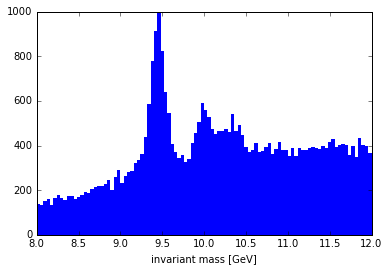

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='b', linewidth=0, edgecolor='b')
plt.xlabel('invariant mass [GeV]')
plt.xlim(xmin,xmax)
plt.show()

In [15]:
# Select for muons of opposite-sign and where both are global muons
ms = df[(df.Q1 != df.Q2) & ((df.Type1 == 'G') & (df.Type2 == 'G'))]
len(ms)

30570

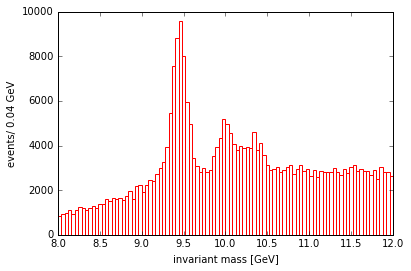

In [24]:
weights = [nbins/m for m in ms['m']]
M_hist = np.histogram(ms['m'], bins=nbins, weights=weights, range=(xmin,xmax))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='r')
plt.xlabel('invariant mass [GeV]')
plt.ylabel('events/ 0.04 GeV')
plt.xlim(xmin,xmax)
plt.show()